# Mecânica Quântica

## Equação de Schrödinger:

De maneira geral, a famosa equação de Schrödinger pode ser escrita da forma:

$$ i\hbar\frac{\partial \psi}{\partial t} = \hat{H} \psi $$

Estaremos, neste curso, interessados no caso específico em que $\hat{H} = \hat{T} + \hat{V}$:

$$ i\hbar\frac{\partial \psi}{\partial t}= -\frac{\hbar^2}{2m}\nabla^2 \psi + V(\vec{r}) \psi   $$

Por meio de separação de variáveis chegamos à:

$$-\frac{\hbar^2}{2m}\nabla^2 \varphi + V(\vec{r}) \varphi = E \varphi  $$


## Partícula confinada:

Imaginemos a situação em que temos uma partícula confinada num poço definido por:

$$V(x) = \left \{ \begin{align} & 0, & ~|x| \leq L \\
& \infty, & ~ |x| > L\end{align} \right.$$

Podemos argumentar que, nesta situação:

$$ 
\begin{align}
\varphi(x) & = 0 ~~~~ & \text{se }~ |x| > L \\
-\frac{\hbar^2}{2m} \frac{d^2\varphi}{dx^2}  &=  E \varphi ~~~~ & \text{se }~ |x| \leq L
\end{align}
$$

Para a região interna do poço:

$$
\begin{align}
\frac{d^2 \varphi}{dx^2}  &= -\frac{2m E}{\hbar^2} \varphi \\
\frac{d^2 \varphi}{dx^2}  &= -k^2 \varphi 
\end{align}
$$
assim

$$ \varphi(x) = A \exp(\pm ikx) $$

$$ k = \sqrt{\frac{2m E}{\hbar^2}} ~~~\longrightarrow~~~ E = \frac{\hbar^2 k^2}{2m}$$

No entanto será mais conveniente usar as combinações lineares especiais dessas soluções conhecidas como seno e cosseno:

$$
\begin{align}
\varphi_{+}(x) &= \frac{A}{2}[\exp(i k_+ x) + \exp(-ik_+ x)] = A \cos(k_+ x) \\
\varphi_{-}(x) &= \frac{A}{2i}[\exp(ik_- x) - \exp(-ik_- x)] = A \sin(k_- x)
\end{align}
$$

### Condições de contorno:

Como $\varphi_{+}(\pm L) = 0$ assim como $\varphi_{-}(\pm L) = 0$, não serão permitidos quaisquer valores de $k_{\pm}$. Para as funções pares, teremos:

$$
\begin{align}
k_{+} &= \frac{n \pi}{2L}, &n = 1,~3,~ 5,~\dots \\
      &= \frac{(2\tilde{n}-1)\pi}{2L}, &\tilde{n}= 1,~2,~\dots
\end{align}
$$

Enquanto que para as funções ímpares, os valores permitidos para $k_{-}$ serão dados por:

$$
k_{-} = \frac{n \pi}{L}, ~~~~~~~n = 1,~2,~\dots
$$

Dessa maneira, as chamadas autoenergias, serão dadas por:


$$
E_{\pm} = \frac{\hbar^2}{2m} k_{\pm}^2  = \left\{\begin{align}
    &= \frac{\hbar^2}{2m} \left[ \frac{(2n - 1) \pi}{2L} \right]^2 \\
    &= \frac{\hbar^2}{2m} \left( \frac{n \pi}{2L} \right)^2
    \end{align}
\right.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=plt.figaspect(0.25))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

L = 10
x = np.linspace(-L,L,101)

markers = ["r-.","g-","b--"]

for n in range(1,4):
    y = np.cos(((2*n -1)* np.pi/(2*L)) * x)
    ax1.plot(x, y, markers[n-1])
    
for n in range(1,4):
    y = np.sin((n* np.pi/(L)) * x)
    ax2.plot(x, y, markers[n-1])

plt.tight_layout()
plt.show()
    

<Figure size 1600x400 with 2 Axes>

In [3]:
def energy_analitica(n, L, parity):
    if parity % 2 == 0:
        return (1/2) * ((2*n-1) * np.pi/(2 * L))**2
    else:
        return (1/2) * (n * np.pi/L)**2

def V_well(x):
    '''
    Define a função potencial com 
    o formato de um poço retangular.
    '''
    L    = 1.0
    Vmax = 500
    if x < L :
        return 0
    else:
        return Vmax

## Solução numérica: Método do "Arremesso" 
### (Shooting  Method)

Vamos tratar o problema de determinar as funções de onda solucionando uma equação diferencial sujeita a certas condições de "contorno".

**Funções pares:** $\varphi(-x) = \varphi(x)$

$$ 
\begin{align}
    \left.\frac{d\varphi}{dx}\right|_{x=0} &= 0 \\
    &\\
    \varphi(0) &= 1 ~~\text{provisoriamente}
\end{align}
$$

**Funções ímpares:** $\varphi(-x) = -\varphi(x)$

$$ 
\begin{align}
    \left.\frac{d\varphi}{dx}\right|_{x=0} &= 1 ~~\text{provisoriamente}\\
    &\\
    \varphi(0) &= 0 
\end{align}
$$

**Equação diferencial discretizada:**

Primeiro escrevemos a seguinte aproximação para a derivada de segunda ordem:

$$
\frac{d^2 \varphi}{dx^2} \approx \frac{\varphi_{n+1} + \varphi_{n-1} - 2 \varphi_{n}}{(\Delta x)^2}
$$

Dessa forma, a equação de Schrödinger independente do tempo e discretizada no espaço fica dada por

$$
-\frac{\hbar^2}{2m} \frac{\varphi_{n+1} + \varphi_{n-1} - 2 \varphi_{n}}{(\Delta x)^2} \approx (E - V_n) \varphi_n
$$

onde $V_n = V(n\Delta x)$. Daqui pra frente $\hbar = 1$ e $m = 1$.

$$ \varphi_{n+1} = 2\varphi_{n}- \varphi_{n-1}- 2(\Delta x)^2(E-V_n)\varphi_{n}$$

In [4]:
def itera(psi0, psi1, Δx, E, V):
    '''
    Nesta função, a partir de psi_0 e psi_1, calculamos
    o valor da função no ponto seguinte psi_2:
    '''
    psi_2 = 2*psi1 - psi0 -2*(Δx**2)*(E-V)*psi1 
    return psi_2



def itera_all(psi_array, E, V, Δx, cutoff):
    
    N = len(psi_array) # Mede o comprimento de psi_array
    
    for i in range(2, N):
        
        psi_array[i] = itera(psi_array[i-2], psi_array[i-1],
                             Δx, E, V(i*Δx))
        
        if abs(psi_array[i]) > cutoff:
            last = psi_array[i]
            return psi_array, last, i
        
    last = psi_array[N-1]
    
    return psi_array, last, N-1
        

## Digressão sobre paridade de funções:


Uma  função $f(x)$ definina de modo que valores reais levam a outros valores reais ($\mathbb{R} \rightarrow \mathbb{R}$) é dita par se 

$$
f(-x) = f(x)
$$

Por outro lado, chamamos de **ímpar** a função $g(x)$ definida nos reais e assumindo valores reais, se

$$
g(-x) = -g(x)
$$

**Exemplos?**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

comprimento da 'metade':  11
comprimento da 'abscissa':  21
comprimento do 'todo':  21


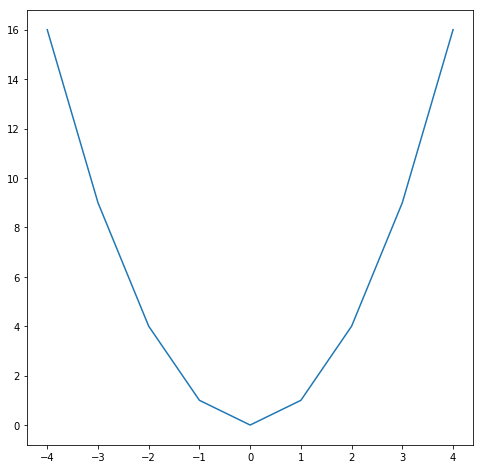

In [6]:
'''
Montar uma array com valores simétricos a 
partir de uma array de nan's: 

Usamos uma array de nan's porque uma vez queremos
que pontos não calculados não assuma valor algum 
algum, deixando assim nosso plot limpo de valores 
espúrios (não calculados).
'''

t     = np.array(range(-10, 11)) # abscissa  do plot [-10, -9, ...,9, 10]
array = np.full(11, np.nan)      # inicia a METADE a ser calculada explicitamente

for i in range(5):
    array[i] = i**2

double = list(array[:0:-1]) # inicia uma lista começando com 'array' invertida e sem o primeiro elemento
double += list(array) # emenda array (como lista) ao final de double

'''
Note que len(t) == len(double) 
'''

print("comprimento da 'metade': ", len(array))
print("comprimento da 'abscissa': ", len(t))
print("comprimento do 'todo': ", len(double))

plt.figure(figsize=(8,8))
plt.plot(t, double)
# plt.plot(t, 3*t**2)
plt.show()

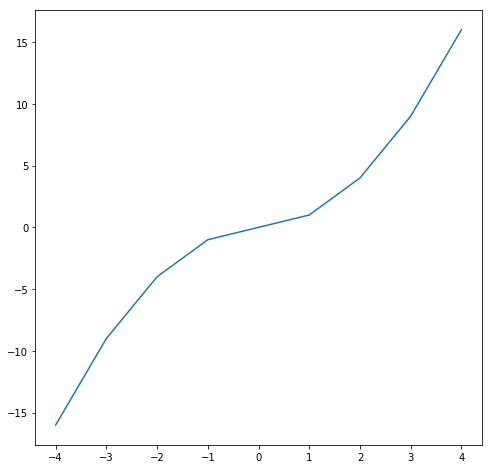

In [7]:
'''
Montar uma array com valores anti-simétricos a 
partir de uma array de nan's: 
'''

nan_array = np.full(11, np.nan) # inicia a metade a ser calculada
t = np.array(range(-10,11)) # abscissa  do plot

for i in range(5):
    nan_array[i] = i**2

double_nan  = list(-1.* nan_array[:0:-1]) # inicia uma lista começando de com 'nan_array' 
                                          # invertida e sem o primeiro elemento

double_nan += list(nan_array) # emenda a array (como lista) ao final de double_nan

plt.figure(figsize=(8,8))
plt.plot(t, double_nan)
#plt.plot(t, 3*t**2)
plt.show()

In [8]:
def duplica(x_half, psi_half, parity=0):
    x_full = list(-1 * x_half[:0:-1]) + list(x_half)
    
    if parity % 2 == 0:    
        psi_full = list(psi_half[:0:-1]) + list(psi_half)
    else:
        psi_full = list(-1*psi_half[:0:-1]) + list(psi_half)
    
    return x_full, psi_full    

In [9]:
def interactive_shooting(x_array_half, V_func, E_i = 1.0, ΔE = 1.,
                         cutoff = 1.5, parity = 0):
    '''
    Decide por parar ou continuar a iterar usando o método
    de Shooting.
    '''

    last_divergency = 2*cutoff
    last_index = len(x_array_half) - 1
    
    while True:
        psi_half = np.full(len(x_array_half), np.nan)
        dx = x_array_half[1] - x_array_half[0]

        if parity % 2 == 0:
            psi_half[0], psi_half[1] = 1., 1. 
        else:
            psi_half[0], psi_half[1] = 0., dx
                
        psi_test, last, index = itera_all(psi_half, E_i, V_func, dx, cutoff)
        x_full, psi_full = duplica(x_array_half, psi_test, parity)
        
        print("""
            E = %g
            Delta  E = %g
            Ultimo ponto = %g
            Indice = %i
        """ % (E_i, ΔE, last, index))
        
        
        fig = plt.figure(figsize=(8,8))
        ax  = fig.add_subplot(111)
        ax.plot(x_full, psi_full)
        plt.show()
        
        aceita = str(input("Aceita o resultado [N/s]: ") or "N")
        print("aceita = ", aceita)
        
        if aceita.lower() == 's':
            break
#             run = False
        else :
            muda = str(input("Muda Delta E [N/s]?") or "N")
            if muda.lower() == 's':
                ΔE *= -1/2
            else:
                troca = str(input("Troca o sinal de Delta E [N/s]?") or "N")
                if troca.lower() == 's':
                    ΔE *= -1
        E_i += ΔE
        
    return psi_test, E_i, index

## Calculando i(N)terativamente:

In [10]:
energy_analitica(n = 1, L=1., parity=0)

1.2337005501361697

## Calculando i(N)terativamente:


            E = 1
            Delta  E = 0.05
            Ultimo ponto = 1.51925
            Indice = 146
        


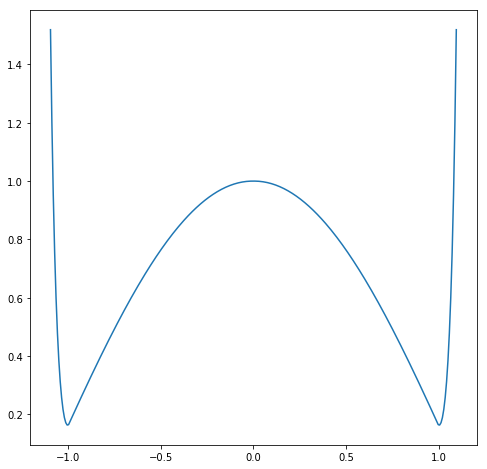

Aceita o resultado [N/s]: s
aceita =  s


In [11]:
paridade = 0


x_metade = np.linspace(0, 1.5, 201)

psi_metade, E, index_end = interactive_shooting(x_metade, 
                                                V_well,
                                                E_i = 1., 
                                                ΔE=0.05, 
                                                parity=paridade, 
                                                cutoff=1.5)


### Exercício 1: 

Implementar uma função potencial com a forma de uma parábola centrada em zero. A curvatura pode ser uma variável local, um argumento padrão, ou adotar a estratégia que preferir. O importante é que se possa chamar essa função com apenas o parâmetro `x`. Só assim podemos usá-la como o argumento `V_func` da função `interactive_shooting`.

Use o potencial parabólico para gerar as 3 autofunções de menor energia usando a função `interactive_shooting`. 

### Exercício 2 (desafio) : 

Escreva uma função `automatic_shooting` que decida por você quando mudar o sinal da função, multiplicar $\Delta E$ por $-1/2$ e quando parar. Use os critérios que você adotou para executar o `interactive_shooting` até chegar numa solução aceitável.

**(Resposta será postada na semana do dia 29/07/2019 no repositório do github)**

### Resposta para o exercício 2:  Versão automática do "Shooting method":

In [12]:
N  = 101 # número de pontos da metade da função de onda (incluindo o zero)
x = np.linspace(0,1.5,N)


def automatic_shooting(x_array, V_func, E=10., ΔE = 0.5, cutoff=1.1, parity=0):
    """
    Essa função aplica de forma automática o "shooting method" uma vez
    fornecidos os seguintes inputs:
        * array da posição;
        * a função potencial;
        * o primeiro "chute" para o valor da energia;
        * valor inicial para o incremento na energia;
        * limite máximo para o módulo da função de onda (cutoff);
        * paridade desejada para a função de onda.
    
    Como output temos
        * a auto-função com a paridade desejada; e
        * e o valor para a auto-energia. 
    """
    dx = x_array[1] - x_array[0]
    count = 0
    sign_list, valor_list, ind_list = [0,0], [0,0], [0,0]

    while True:
        
        psi_array = np.full(len(x_array), np.nan) # Define array resposta
        
        if parity % 2 == 0:
            psi_array[0], psi_array[1] = 1., 1. 
        else:
            psi_array[0], psi_array[1] = 0., dx

        psi_array, last_value, last_index = itera_all(psi_array, E, V_func, dx, cutoff)
        
        sign_list += [int(np.sign(last_value))]
        sign_list.pop(0)
        
        valor_list += [abs(last_value)]
        valor_list.pop(0)
        
        ind_list += [last_index]
        ind_list.pop(0)
        
        
        if (count % 2 == 1):
            if sign_list[1] != sign_list[0]:
                ΔE *= -1/2
            elif (valor_list[1] > valor_list[0]) and (ind_list[1] <= ind_list[0]):
                ΔE *= -1
                
        if (abs(ΔE) < 1e-9):
            break
            
        E += ΔE
        
        
        count += 1
        
    return psi_array, E

Energy: 1.21532


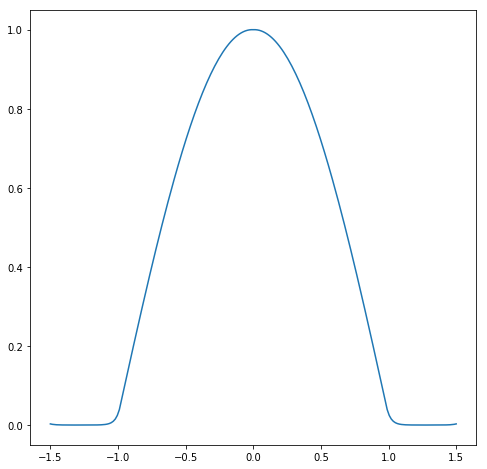

In [18]:
E_chute = 1.5
paridade = 0

psi_array, E = automatic_shooting(x, V_well, E = E_chute, parity = paridade) 

x_dobro, ψ_dobro = duplica(x, psi_array, parity = paridade)

print("Energy: %g" % E)
plt.figure(figsize=(8,8))
plt.plot(x_dobro, ψ_dobro)
plt.show()